## The goal of this kernel is to find variables which are linear with price or log_price

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('../../data/train_total.csv')
test = pd.read_csv('../../data/test_total.csv')

## Use statsmodels

In [5]:
#from __future__ import print_function
from statsmodels.compat import lzip
import statsmodels.api as sm
from statsmodels.formula.api import ols

/home/mes/venv/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


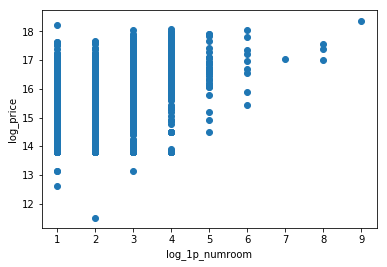

In [4]:
plt.scatter(train.num_room, train.log_price)
plt.xlabel('log_1p_numroom')
plt.ylabel('log_price')

In [6]:
num_room = ols("log_price ~ num_room", data=train).fit()

In [8]:
num_room.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     4949.
Date:                Fri, 26 May 2017   Prob (F-statistic):               0.00
Time:                        00:32:58   Log-Likelihood:                -16508.
No. Observations:               20895   AIC:                         3.302e+04
Df Residuals:                   20893   BIC:                         3.304e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.0667      0.009   1632.927      0.000      15.049      15.085
num_room       0.3118      0.004     70.347      0.000       0.303       0.320
==============================================================================
Omnibus:                     5583.895   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19225.234
Skew:                          -1.332   Prob(JB):                         0.00
Kurtosis:                       6.871   Cond. No.                         6.25
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

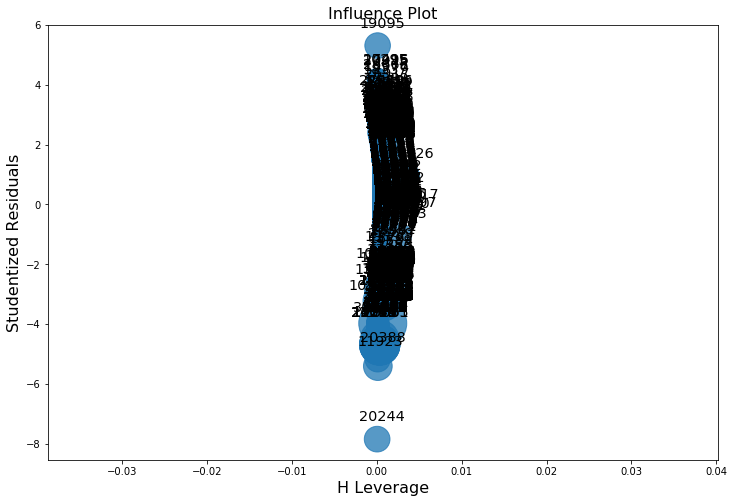

In [9]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(num_room, ax=ax, criterion="cooks")

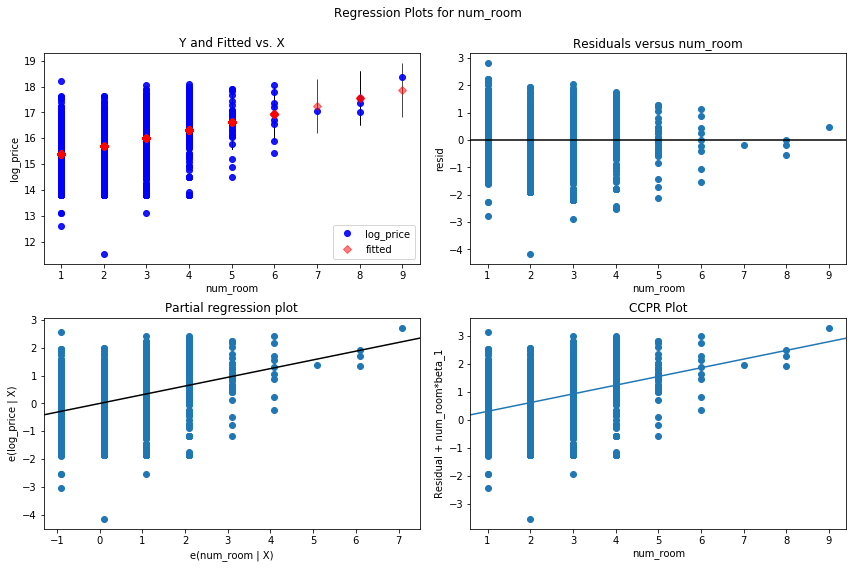

In [10]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(num_room, "num_room", fig=fig)

In [ ]:
max_room = 